<a href="https://colab.research.google.com/github/MohamedHamdy98/detection_cows_disease/blob/main/object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import sys
sys.path.append("/content/drive/MyDrive/colab_env/lib/python3.10/site-packages")

In [4]:
import cv2
from ultralytics import YOLO, solutions
from roboflow import Roboflow

In [5]:
rf = Roboflow(api_key="JcSJx2z2jfDuc2hdVjXe")
project = rf.workspace("yuossef").project("lumpy-skin-diesease")
version = project.version(6)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.39, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to lumpy-skin-diesease--6 in yolov8:: 100%|██████████| 1490/1490 [00:00<00:00, 7686.81it/s]


In [6]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 71.1MB/s]


In [7]:
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [10]:
results = model.train(data='/content/lumpy-skin-diesease--6/data.yaml', epochs=4, imgsz=640)

New https://pypi.org/project/ultralytics/8.2.48 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.39 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/lumpy-skin-diesease--6/data.yaml, epochs=4, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=Fa

100%|██████████| 755k/755k [00:00<00:00, 16.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/lumpy-skin-diesease--6/train/labels... 603 images, 0 backgrounds, 0 corrupt: 100%|██████████| 603/603 [00:00<00:00, 1701.54it/s]

train: New cache created: /content/lumpy-skin-diesease--6/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/lumpy-skin-diesease--6/valid/labels... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<00:00, 1414.37it/s]

val: New cache created: /content/lumpy-skin-diesease--6/valid/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train3
Starting training for 4 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/4         0G     0.6435      1.604      1.275         32        640: 100%|██████████| 38/38 [09:11<00:00, 14.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:24<00:00,  8.32s/it]

                   all         68        104      0.817      0.602      0.623      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/4         0G     0.6783      1.159      1.283         36        640: 100%|██████████| 38/38 [09:07<00:00, 14.40s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:22<00:00,  7.57s/it]

                   all         68        104      0.488      0.529      0.379      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/4         0G     0.6757      1.021      1.264         36        640: 100%|██████████| 38/38 [09:02<00:00, 14.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.76s/it]

                   all         68        104      0.883      0.615      0.656       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/4         0G     0.6457     0.9115      1.249         36        640: 100%|██████████| 38/38 [09:04<00:00, 14.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:23<00:00,  7.97s/it]

                   all         68        104      0.849      0.651      0.709      0.527



4 epochs completed in 0.636 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.2MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.2.39 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:20<00:00,  6.88s/it]


                   all         68        104      0.849       0.65       0.71      0.527
Speed: 10.2ms preprocess, 273.7ms inference, 0.0ms loss, 4.9ms postprocess per image
Results saved to runs/detect/train3


In [12]:
from IPython.display import display, Image

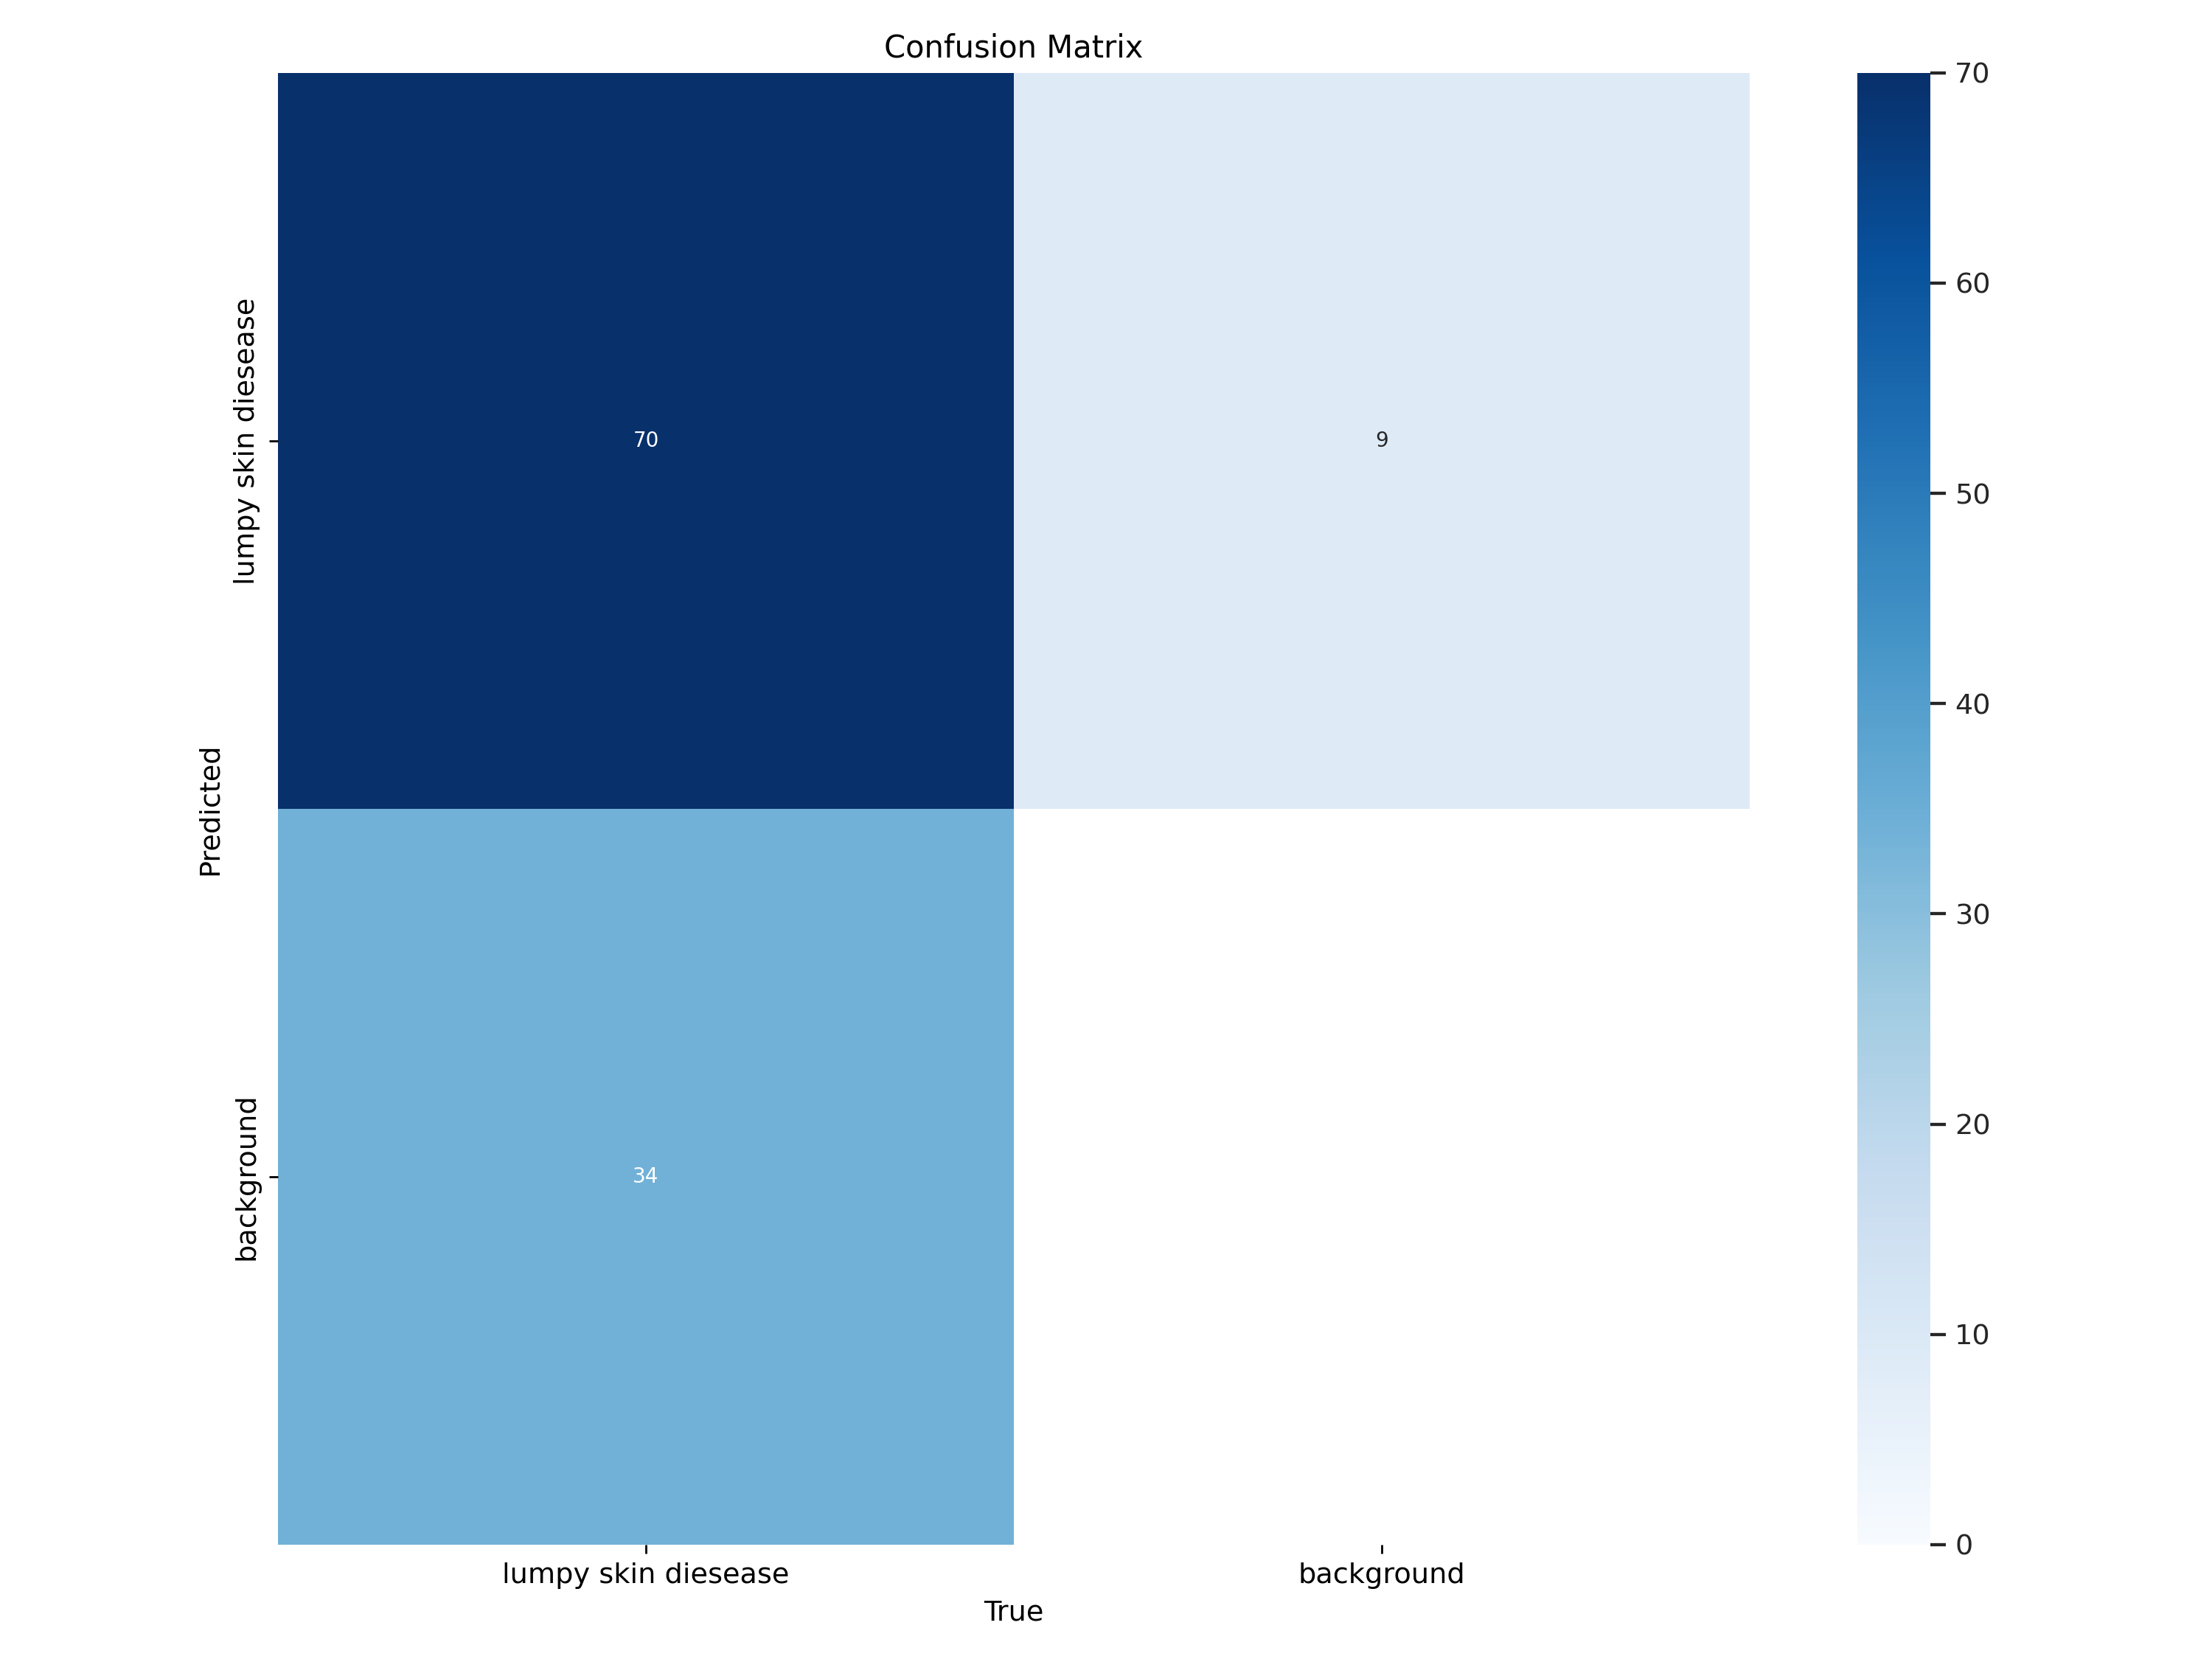

In [14]:
Image(filename='/content/runs/detect/train3/confusion_matrix.png', height=450)

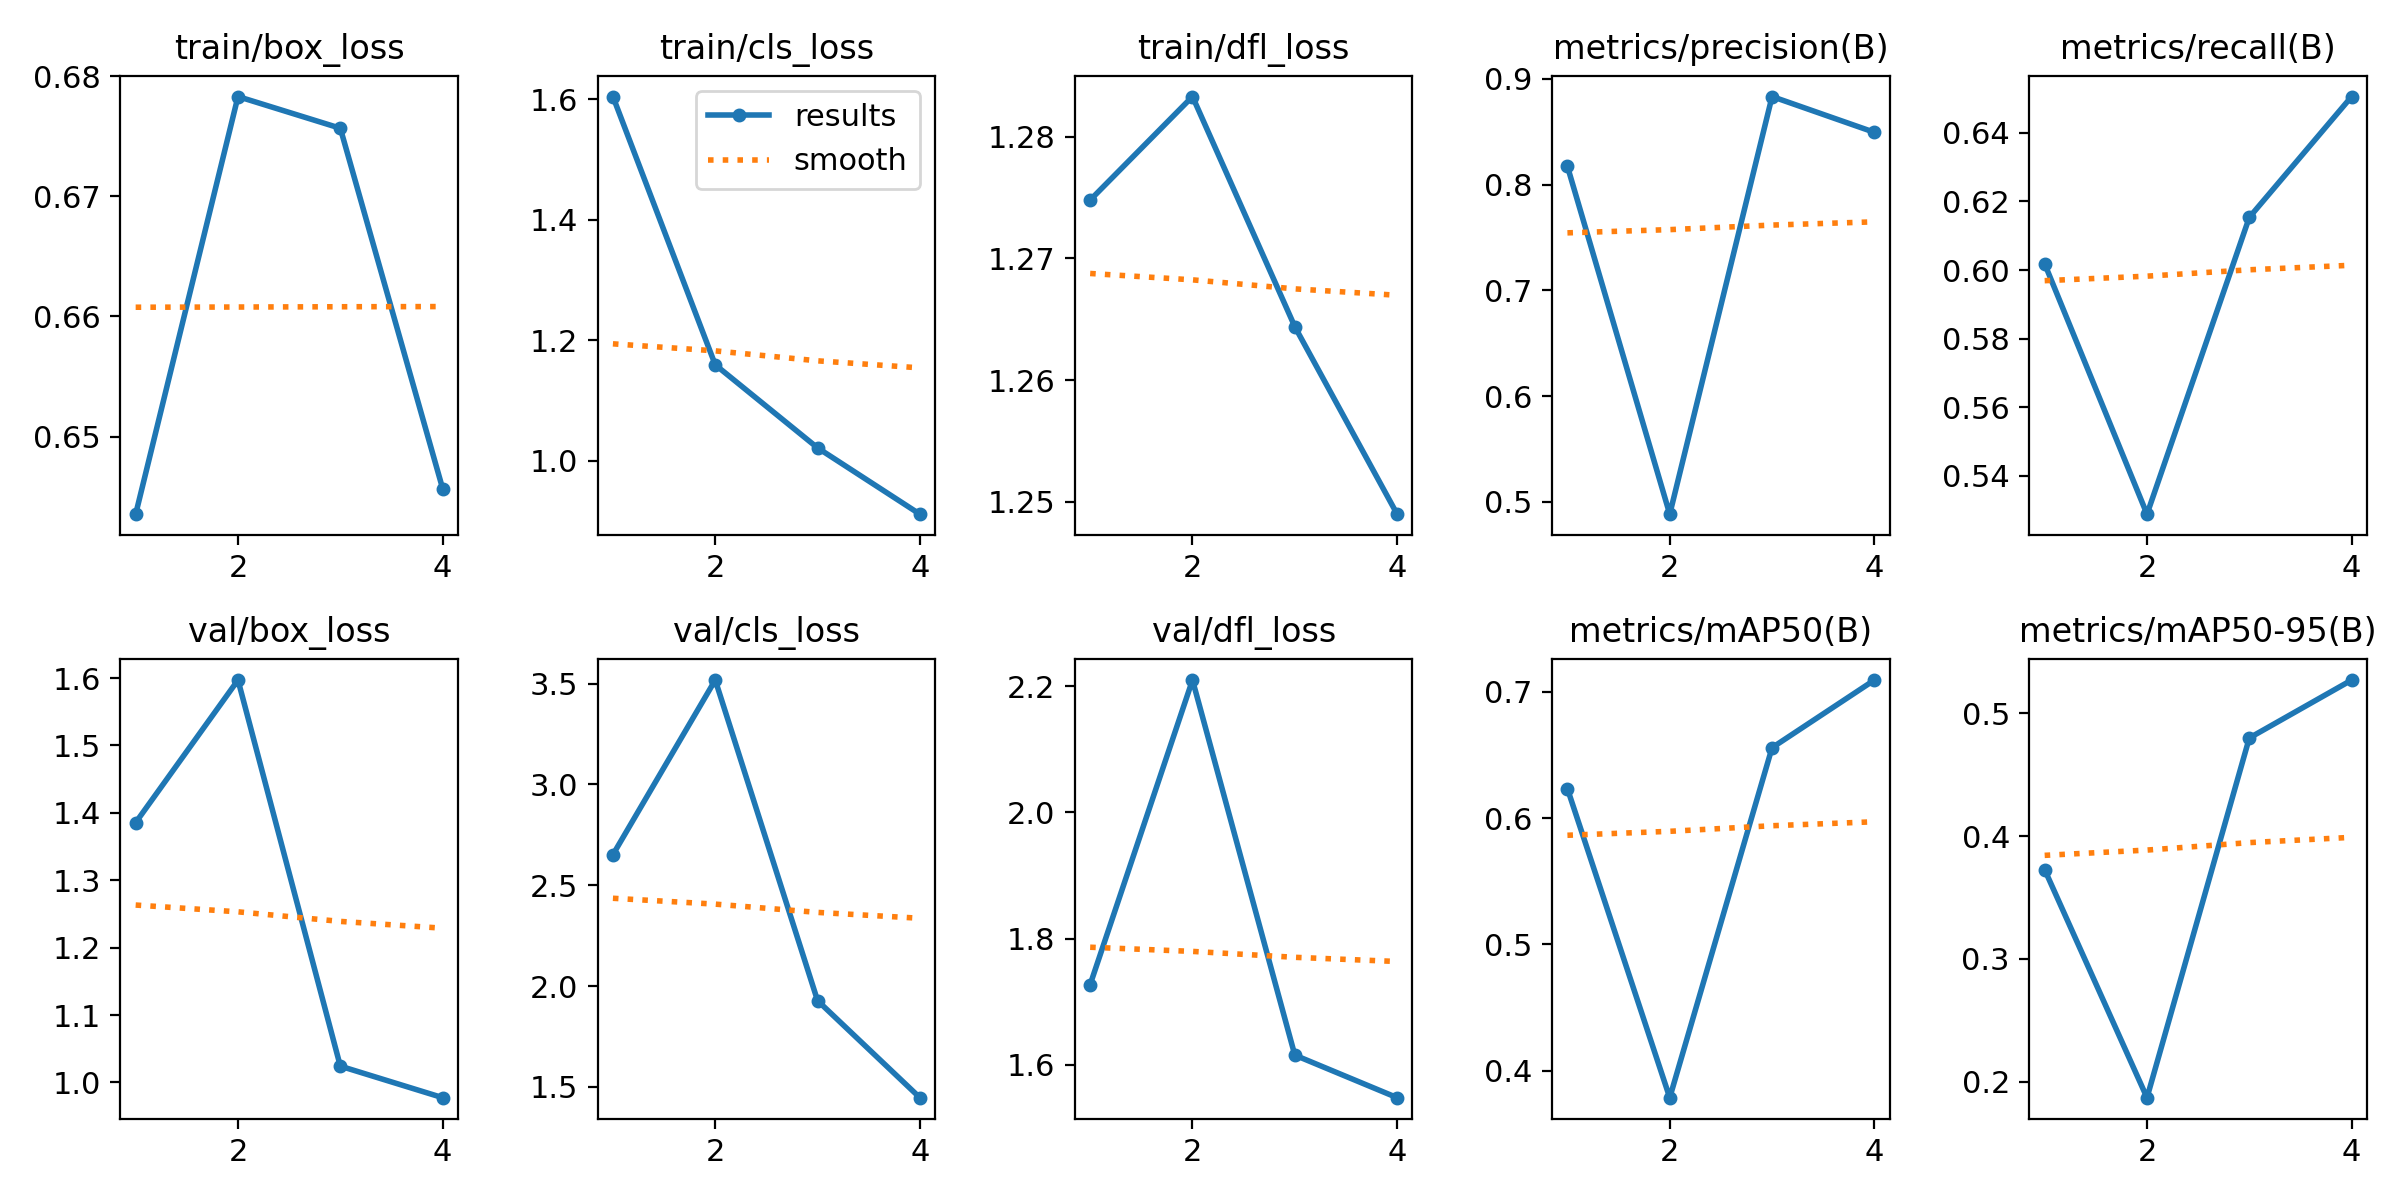

In [18]:
Image(filename='/content/runs/detect/train3/results.png', height=450)

In [25]:
model_best = '/content/runs/detect/train3/weights/best.pt'

In [26]:
model_custome = YOLO(model_best)

In [27]:
metrics = model_custome.val()

Ultralytics YOLOv8.2.39 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/lumpy-skin-diesease--6/valid/labels.cache... 68 images, 0 backgrounds, 0 corrupt: 100%|██████████| 68/68 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:21<00:00,  4.34s/it]


                   all         68        104      0.849       0.65       0.71      0.527
Speed: 4.0ms preprocess, 297.5ms inference, 0.0ms loss, 5.0ms postprocess per image
Results saved to runs/detect/val2


In [31]:
!pip install pytube

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 945.0 kB/s eta 0:00:00


In [32]:
from pytube import YouTube
video_url = 'https://www.youtube.com/shorts/JsXC6qSf8C4'

# Download the video
yt = YouTube(video_url)
stream = yt.streams.first()
stream.download(filename='video.mp4')

'/content/video.mp4'

In [34]:
model_custome.predict('/content/video.mp4')



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/791) /content/video.mp4: 640x384 1 lumpy skin diesease, 195.7ms
video 1/1 (frame 2/791) /content/video.mp4: 640x384 1 lumpy skin diesease, 155.9ms
video 1/1 (frame 3/791) /content/video.mp4: 640x384 1 lumpy skin diesease, 155.3ms
video 1/1 (frame 4/791) /content/video.mp4: 640x384 1 lumpy skin diesease, 148.1ms
video 1/1 (frame 5/791) /content/video.mp4: 640x384 1 lumpy skin diesease, 143.4ms
video 1/1 (frame 6/791) /content/video.mp

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'lumpy skin diesease'}
 obb: None
 orig_img: array([[[184, 191, 202],
         [184, 191, 202],
         [184, 191, 202],
         ...,
         [ 52,  76, 127],
         [ 51,  75, 126],
         [ 51,  75, 126]],
 
        [[184, 191, 202],
         [184, 191, 202],
         [184, 191, 202],
         ...,
         [ 52,  76, 127],
         [ 51,  75, 126],
         [ 51,  75, 126]],
 
        [[184, 191, 202],
         [184, 191, 202],
         [182, 189, 200],
         ...,
         [ 51,  75, 126],
         [ 50,  74, 125],
         [ 50,  74, 125]],
 
        ...,
 
        [[ 82, 106, 123],
         [117, 141, 158],
         [147, 171, 188],
         ...,
         [133, 156, 187],
         [134, 157, 188],
         [136, 159, 190]],
 
        [[120, 144, 161],
         [147, 171, 188],
         [117, 141, 158],
         ...,
     